<a href="https://colab.research.google.com/github/goswamimohit/2018-02-olympic-figure-skating-analysis/blob/master/Bank1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [51]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "png"

In [29]:
pip install chart-studio

In [30]:
from chart_studio import plotly

In [31]:
import plotly.express as px
 

In [32]:
import plotly as py
import plotly.graph_objs as go

In [33]:
train=pd.read_csv('/content/train.csv',sep=';')
test=pd.read_csv('/content/test.csv',sep=';')
bank=pd.concat([train,test],ignore_index=True)

In [34]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [36]:
for col in bank.columns:

  print('Number of Unique Values in',col.title() ,('-'),(bank[col].nunique()))

Number of Unique Values in Age - 77
Number of Unique Values in Job - 12
Number of Unique Values in Marital - 3
Number of Unique Values in Education - 4
Number of Unique Values in Default - 2
Number of Unique Values in Balance - 7168
Number of Unique Values in Housing - 2
Number of Unique Values in Loan - 2
Number of Unique Values in Contact - 3
Number of Unique Values in Day - 31
Number of Unique Values in Month - 12
Number of Unique Values in Duration - 1573
Number of Unique Values in Campaign - 48
Number of Unique Values in Pdays - 559
Number of Unique Values in Previous - 41
Number of Unique Values in Poutcome - 4
Number of Unique Values in Y - 2


In [37]:
(bank.pdays.unique ()==999).sum()#checking 999 if present client not previously contacted

0

Every client is previousaly contacted as abensce of 999 clearly show to us.

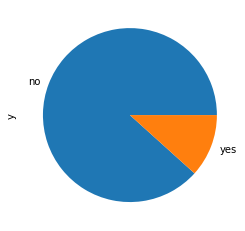

In [38]:
proprtion_of_positive_outcome_in_total_obervation = bank.y.value_counts()/len(bank)
proprtion_of_positive_outcome_in_total_obervation.plot(kind='pie')

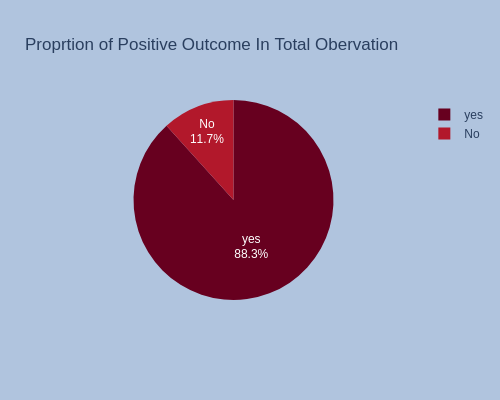

In [52]:
fig = px.pie(proprtion_of_positive_outcome_in_total_obervation, values=proprtion_of_positive_outcome_in_total_obervation,
             names=["yes",'No'],title='Proprtion of Positive Outcome In Total Obervation',hover_data=['y'],
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(autosize=True,width=500,height=400,margin=dict(l=50,r=50,b=100,t=100,pad=4),paper_bgcolor="LightSteelBlue")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# The socio-economic variables are a statistical indicator of the customer themselves based on various other factors, so it has a lot of information in it which should be used for analysis.

# Socio Economic Profile

- job
- education
- marriage
- defaulted
- age

In [40]:
bins = [0, 25, 40, 60, 100]
labels = ['18-25','26-40','41-60','60>']
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels)


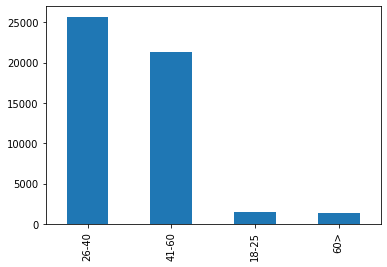

In [41]:
bank.age_group.value_counts().plot(kind='bar')

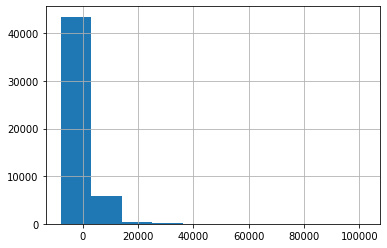

In [42]:
bank.balance.hist()

In [43]:
bank['new_bal']=bank['balance'].copy(deep=True)

In [44]:
bank.loc[bank['new_bal'] > 15000, 'new_bal'] = 15000
bank.loc[bank['new_bal'] < 0, 'new_bal'] = 0

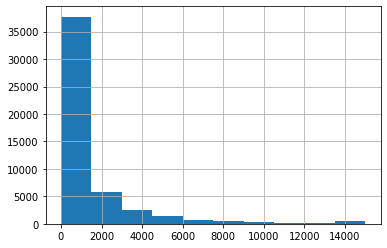

In [45]:
bank['new_bal'].hist()

In [46]:
job_y = bank.groupby(by=["job", "y"]).size().reset_index(name="counts")

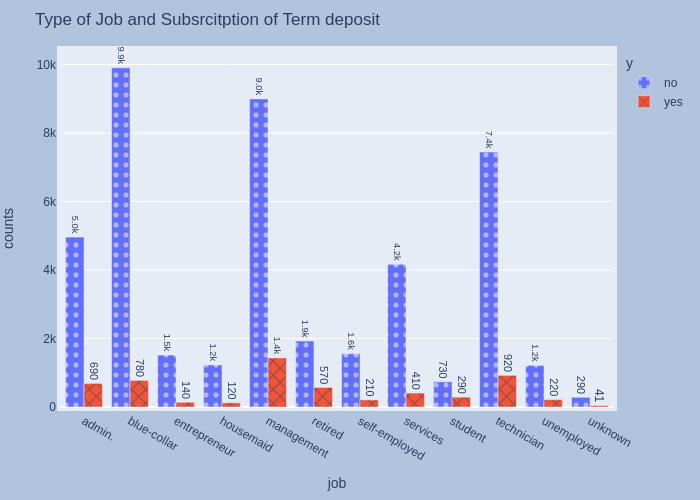

In [53]:
fig = px.bar(job_y, x="job", y="counts", color='y',text="job",title="Type of Job and Subsrcitption of Term deposit ", barmode="group", pattern_shape="y", pattern_shape_sequence=[".", "x"], text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

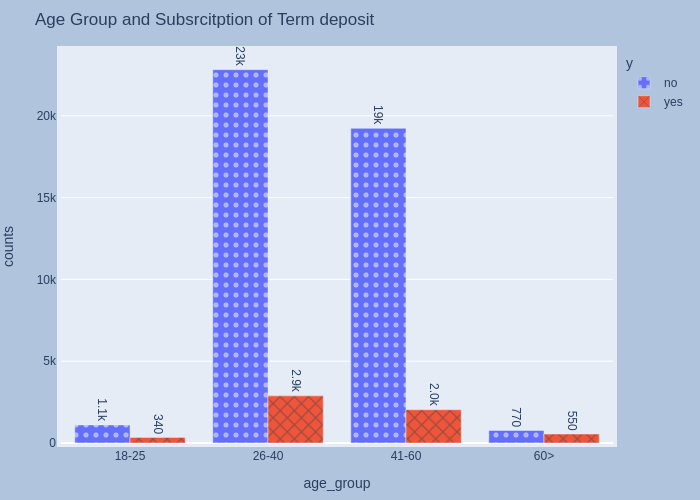

In [54]:
age_y = bank.groupby(by=["age_group", "y"]).size().reset_index(name="counts")

fig = px.bar(age_y, x="age_group", y="counts", color='y',text="age_group",title="Age Group and Subsrcitption of Term deposit ", barmode="group", pattern_shape="y", pattern_shape_sequence=[".", "x"], text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show()

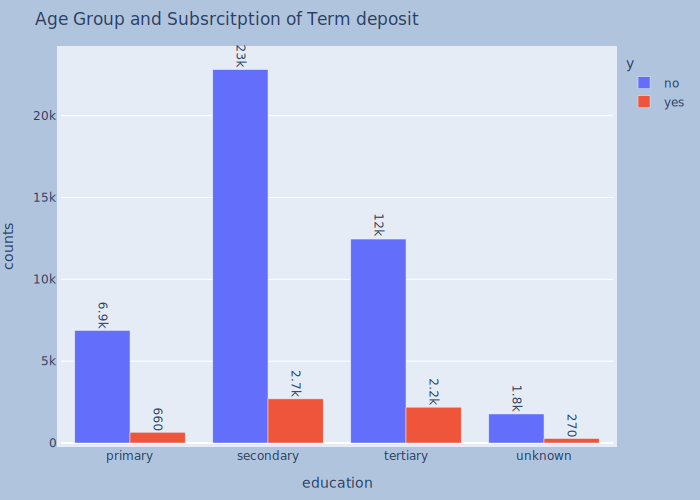

In [55]:
education_y = bank.groupby(by=["education", "y"]).size().reset_index(name="counts")

fig = px.bar(education_y, x="education", y="counts", color='y',text="education",title="Age Group and Subsrcitption of Term deposit ", barmode="group", text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=90, textposition="outside", cliponaxis=False)
fig.update_layout(autosize=True,margin=dict(l=30,r=30,b=30,t=50,pad=4),paper_bgcolor="LightSteelBlue")
fig.show(renderer="svg")